In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\Users\poulomi.dey\Downloads\KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [35]:
print("Number of Companies for campaign : ",len(df['xyz_campaign_id'].unique()))
print("Male to Female ratio : ", len(df[df['gender']=='M'])/len(df[df['gender']=='F']))

Number of Companies for campaign :  3
Male to Female ratio :  1.074410163339383


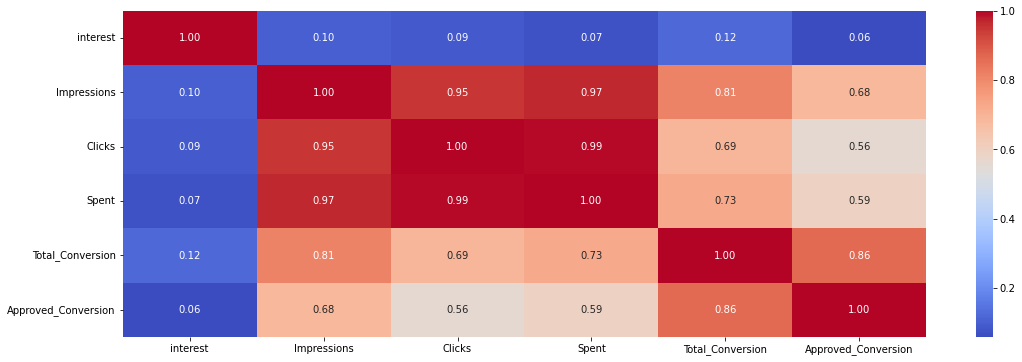

In [6]:
plt.figure(figsize=(18,6))
x=sns.heatmap(df[df.columns.difference(['ad_id','fb_campaign_id','xyz_campaign_id'], sort=False)].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

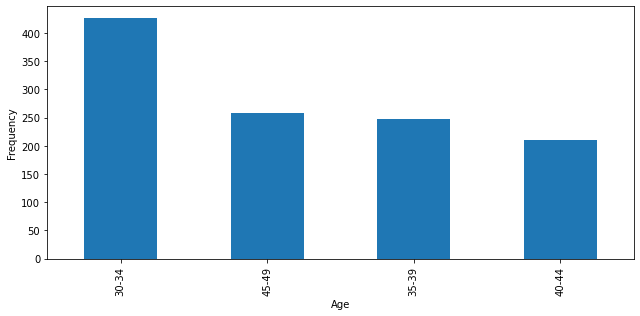

In [7]:
#no of people in each age group

plt.rcParams["figure.figsize"] = [9, 4.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df['age'].value_counts().plot(ax=ax, kind='bar', xlabel='Age', ylabel='Frequency')
plt.show()

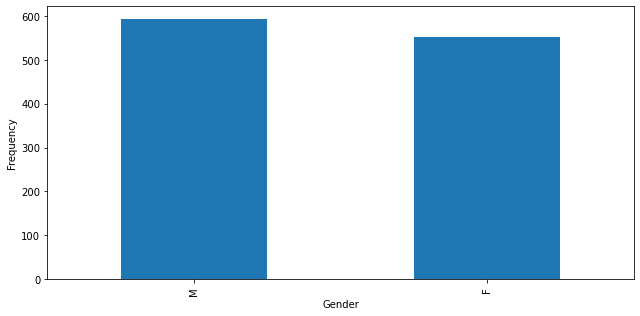

In [8]:
#no of people by gender
plt.rcParams["figure.figsize"] = [9, 4.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df['gender'].value_counts().plot(ax=ax, kind='bar', xlabel='Gender', ylabel='Frequency')
plt.show()

In [9]:
import plotly.express as px

In [12]:
# Grouping the data based on Age and Gender

df2 = df.groupby(['age','gender'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()
df2['clickToImpPer']=df2['Clicks']/df2['Impressions']
df2

,age,gender,interest,Impressions,Spent,Total_Conversion,Clicks,clickToImpPer
0,30-34,F,31.878173,160261.807107,38.636954,3.142132,25.883249,0.000162
1,30-34,M,29.912664,159045.602620,33.366463,3.545852,19.144105,0.000120
2,35-39,F,36.431193,196692.706422,55.608716,2.788991,38.174312,0.000194
3,35-39,M,31.863309,148670.064748,36.338705,2.316547,21.100719,0.000142
4,40-44,F,36.000000,218655.841121,69.126916,3.009346,48.383178,0.000221
5,40-44,M,32.796117,157360.504854,40.710194,1.951456,24.844660,0.000158
6,45-49,F,33.898551,278663.702899,97.342101,2.891304,68.413043,0.000246
7,45-49,M,33.173554,208903.033058,60.474876,2.355372,36.454545,0.000175


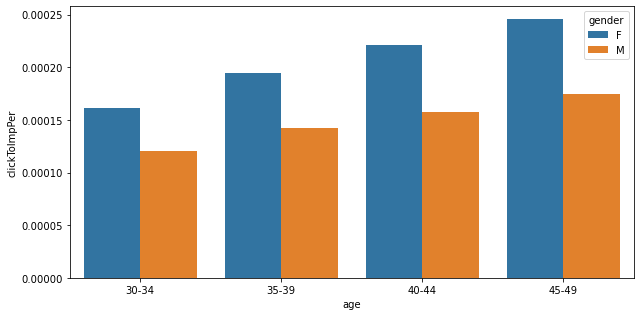

In [13]:
# Plot for Click to Impression vs Age
#age group 45-49(females) have highest clicktoimpression ratio than males.

sns.barplot(x=df2.age,y=df2.clickToImpPer,hue=df2.gender)
plt.show()

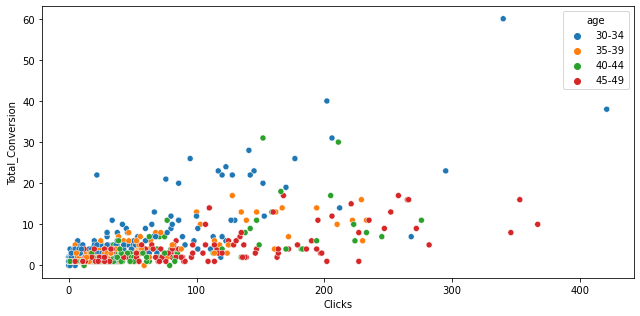

In [14]:
# Scatterplot showing Total Conversions vs Clicks for each age group

sns.scatterplot(x = df['Clicks'], y = df['Total_Conversion'], hue=df["age"])
plt.show()

In [15]:
# Overall Stats for each age group

df.groupby(['age'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks']].mean()

,age,interest,Impressions,Spent,Total_Conversion,Clicks
0,30-34,30.821596,159608.025822,35.803756,3.359155,22.260563
1,35-39,33.870968,169776.790323,44.808185,2.524194,28.604839
2,40-44,34.428571,188591.938095,55.189190,2.490476,36.838095
3,45-49,33.559846,246072.810811,80.118417,2.640927,53.482625


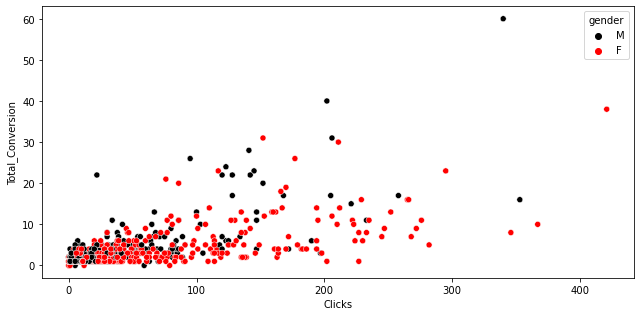

In [16]:
#  Total Conversions vs Clicks for each gender 

sns.scatterplot(x = df['Clicks'], y = df['Total_Conversion'], hue=df["gender"], palette = ['black','red'])
plt.show()


In [19]:
# Clicks to Impression ratio

df['clickToImpPer']=(df['Clicks']/df['Impressions'])*100
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.022305
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.018822
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.018478
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.017083


In [20]:
df3=df.groupby("fb_campaign_id")[["interest","Impressions","Spent","Total_Conversion","Clicks","clickToImpPer"]].mean()

from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled_features = scaled.fit_transform(df3.values)



# Standard Scaling the data

df3=pd.DataFrame(scaled_features)
df3 = df3.rename(columns = {0:'interest',1:'Impressions',2:'Spent',3:'Total_Conversion',4:"Clicks",5:"clickToImpPer"})
df3

,interest,Impressions,Spent,Total_Conversion,Clicks,clickToImpPer
0,-0.718461,-0.544212,-0.537518,-0.105550,-0.528206,-0.242001
1,-0.686671,-0.496973,-0.531313,-0.105550,-0.504802,-0.427322
2,-0.559513,-0.574131,-0.560269,-0.413768,-0.551610,-1.289145
3,-0.305197,-0.558388,-0.540063,-0.413768,-0.528206,0.545518
4,-0.273408,-0.568639,-0.560269,-0.413768,-0.551610,-1.289145
...,...,...,...,...,...,...
686,2.269751,4.500314,5.138518,3.284851,5.346193,0.427589
687,2.301540,2.288102,2.206154,0.202669,2.256867,0.159498
688,2.333330,0.103783,0.080743,-0.105550,0.103701,0.133021
689,2.396908,2.974403,2.601199,1.743760,2.607927,0.025660


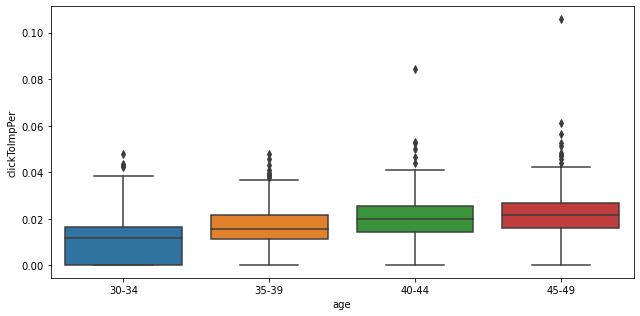

In [21]:
# Box plot for Click to Impression ratio vs Age

sns.boxplot(x = df['age'], y = df['clickToImpPer'])
plt.show()

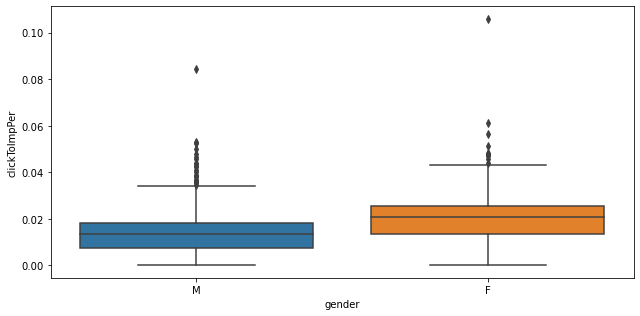

In [22]:
# Box plot for Click to Impression ratio vs Gender

sns.boxplot(x = df['gender'], y = df['clickToImpPer'])
plt.show()

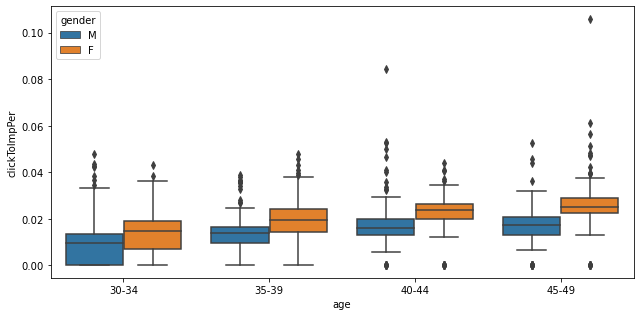

In [23]:
# Box plot for Click to Impression ratio vs Age for each gender

sns.boxplot(x = df['age'], y = df['clickToImpPer'], hue=df["gender"])
plt.show()

In [ ]:
#The target group of people with higher clickthrough rates are:
* Females in age group 45-49
* Females in age group 40-44

In [24]:
# Group the data based on age groups
df4 = df.groupby(['age'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks',"Approved_Conversion"]].mean()
df4['clickToImpPer']=df4['Clicks']/df4['Impressions']
df4

,age,interest,Impressions,Spent,Total_Conversion,Clicks,Approved_Conversion,clickToImpPer
0,30-34,30.821596,159608.025822,35.803756,3.359155,22.260563,1.159624,0.000139
1,35-39,33.870968,169776.790323,44.808185,2.524194,28.604839,0.834677,0.000168
2,40-44,34.428571,188591.938095,55.189190,2.490476,36.838095,0.809524,0.000195
3,45-49,33.559846,246072.810811,80.118417,2.640927,53.482625,0.803089,0.000217


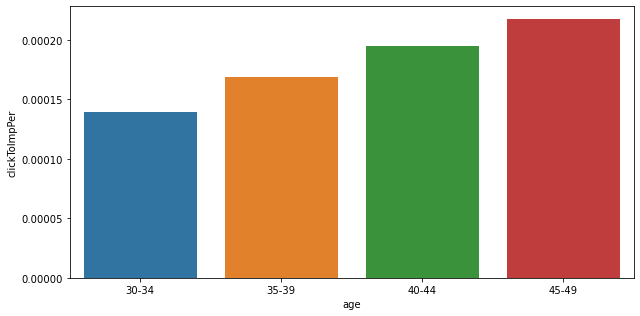

In [25]:
# Plot for Click to Impression ratio vs Age

sns.barplot(x = df4['age'], y = df4['clickToImpPer'])
plt.show()

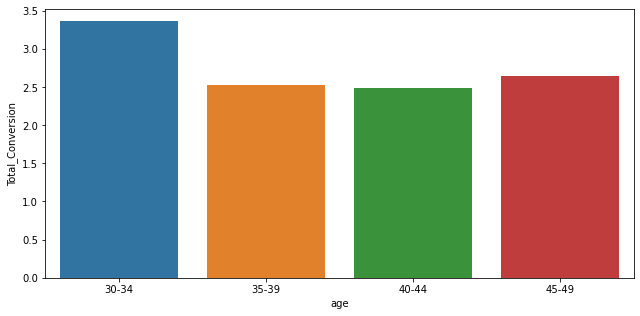

In [26]:
# Plot for Total Conversion vs Age

sns.barplot(x = df4['age'], y = df4['Total_Conversion'])
plt.show()

In [ ]:
#The Click to Impression ratio is more for the age group of 45-49. It means they click more often on the ads than other age groups.
* Although people in age group 30-34 have less click to impression ratio but they have high total conversions. It means they enquire more about the products than any other age groups.
* The age group 30-34 have high approved conversions than other age groups, i.e, they buy more products than other people.


In [27]:
tempdf=df.groupby(['xyz_campaign_id'],as_index=False)[['interest','Impressions','Spent','Total_Conversion','Clicks',"Approved_Conversion"]].mean()
tempdf['clickToImpPer']=tempdf['Clicks']/tempdf['Impressions']
tempdf

,xyz_campaign_id,interest,Impressions,Spent,Total_Conversion,Clicks,Approved_Conversion,clickToImpPer
0,916,21.981481,8943.055556,2.772407,1.074074,2.092593,0.444444,0.000234
1,936,25.047414,17517.644397,6.235711,1.157328,4.275862,0.394397,0.000244
2,1178,39.428800,327717.945600,89.059440,4.270400,57.708800,1.395200,0.000176


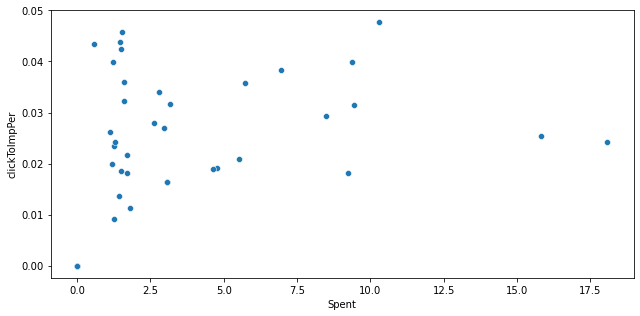

In [28]:
# Plot for Click to Impression ratio vs Expenditure for Company 1

sns.scatterplot(x=df[df["xyz_campaign_id"]==916]["Spent"],y=df[df["xyz_campaign_id"]==916]["clickToImpPer"])
plt.show()

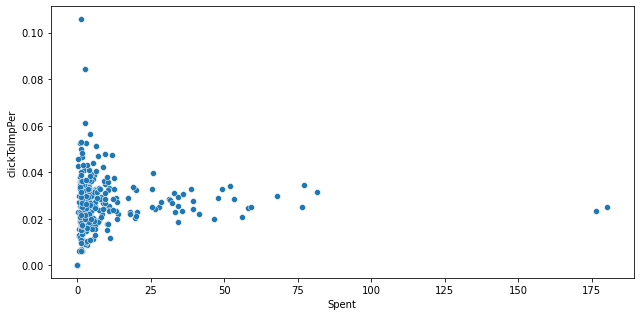

In [29]:
# Plot for Click to Impression ratio vs Expenditure for Company 2 

sns.scatterplot(x=df[df["xyz_campaign_id"]==936]["Spent"],y=df[df["xyz_campaign_id"]==936]["clickToImpPer"])
plt.show()

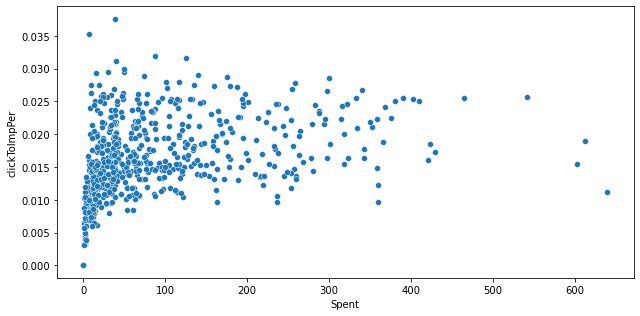

In [30]:
# Plot for Click to Impression ratio vs Expenditure for Company 3

sns.scatterplot(x=df[df["xyz_campaign_id"]==1178]["Spent"],y=df[df["xyz_campaign_id"]==1178]["clickToImpPer"])
plt.show()

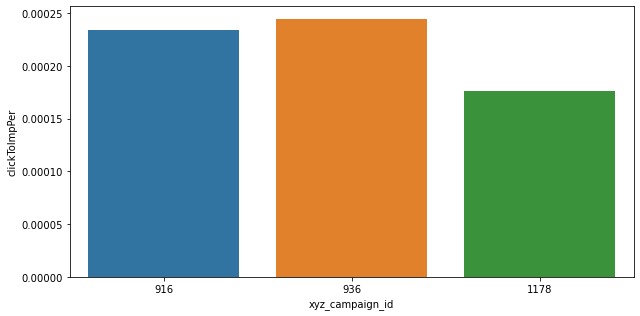

In [31]:
# Plot for CLick to Impression ratio for each company

sns.barplot(x = tempdf['xyz_campaign_id'], y = tempdf['clickToImpPer'])
plt.show()

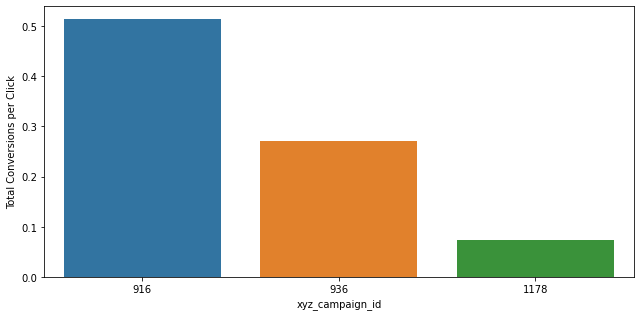

In [32]:
# Plot for Total Conversions per Click for each Company

ax = sns.barplot(x = tempdf['xyz_campaign_id'], y = tempdf['Total_Conversion']/tempdf["Clicks"])
ax.set(xlabel='xyz_campaign_id', ylabel='Total Conversions per Click')
plt.show()


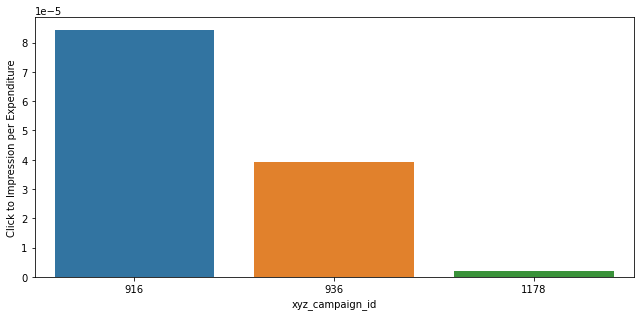

In [33]:
# Plot for Click to Impression per Expenditure for each Company

ax = sns.barplot(x = tempdf['xyz_campaign_id'], y = tempdf['clickToImpPer']/tempdf['Spent'])
ax.set(xlabel='xyz_campaign_id', ylabel='Click to Impression per Expenditure')
plt.show()

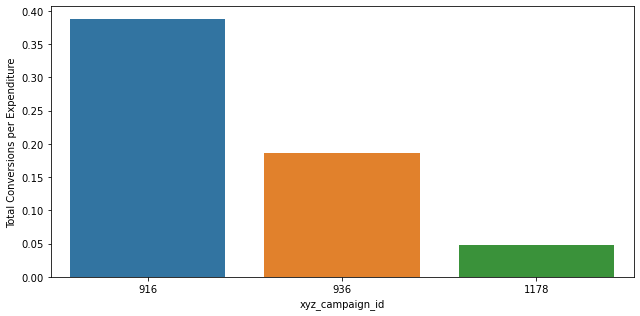

In [34]:
# Plot for Total Conversions per Expenditure for each Company

ax = sns.barplot(x = tempdf['xyz_campaign_id'], y = tempdf['Total_Conversion']/tempdf['Spent'])
ax.set(xlabel='xyz_campaign_id', ylabel='Total Conversions per Expenditure')
plt.show()

In [ ]:
The total number of conversions for Company 3 is more. This is because it has relatively very high number of datapoints.
* The Clicks to Impression ratio is higher for Company 2.
* For Company 1 the Total conversions per expenditure, Click to Impression ratio per expenditure and Total conversions per click is higher than others.
Therefore, Company 1 has the best campaign performance